In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pickle

## implement behavioral cloning 

In [3]:
with open('expert_data/Hopper-v2.pkl', 'rb') as f:
    data = pickle.loads(f.read())

In [4]:
data['actions'].shape

(1000, 1, 3)

In [5]:
data['observations'].shape

(1000, 11)

In [6]:
actions_data = data['actions'].squeeze(axis=1)
observations_data = data['observations']

In [7]:
model = keras.Sequential([
    keras.layers.Dense(11, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(3)
])

In [8]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [19]:
train = model.fit(observations_data, actions_data, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 63us/step - loss: 2.4760 - acc: 0.3650
Epoch 2/100
1000/1000 [==============================] - 0s 72us/step - loss: 2.4716 - acc: 0.3660
Epoch 3/100
1000/1000 [==============================] - 0s 54us/step - loss: 2.4673 - acc: 0.3660
Epoch 4/100
1000/1000 [==============================] - 0s 48us/step - loss: 2.4631 - acc: 0.3660
Epoch 5/100
1000/1000 [==============================] - 0s 50us/step - loss: 2.4588 - acc: 0.3660
Epoch 6/100
1000/1000 [==============================] - 0s 50us/step - loss: 2.4545 - acc: 0.3660
Epoch 7/100
1000/1000 [==============================] - 0s 47us/step - loss: 2.4503 - acc: 0.3660
Epoch 8/100
1000/1000 [==============================] - 0s 48us/step - loss: 2.4461 - acc: 0.3660
Epoch 9/100
1000/1000 [==============================] - 0s 55us/step - loss: 2.4419 - acc: 0.3680
Epoch 10/100
1000/1000 [==============================] - 0s 61us/step - loss: 2.4377 - acc: 0.3670
Epoch 11/

Epoch 83/100
1000/1000 [==============================] - 0s 76us/step - loss: 2.1681 - acc: 0.3880
Epoch 84/100
1000/1000 [==============================] - 0s 61us/step - loss: 2.1649 - acc: 0.3880
Epoch 85/100
1000/1000 [==============================] - 0s 40us/step - loss: 2.1616 - acc: 0.3880
Epoch 86/100
1000/1000 [==============================] - 0s 48us/step - loss: 2.1584 - acc: 0.3890
Epoch 87/100
1000/1000 [==============================] - 0s 42us/step - loss: 2.1552 - acc: 0.3890
Epoch 88/100
1000/1000 [==============================] - 0s 44us/step - loss: 2.1521 - acc: 0.3890
Epoch 89/100
1000/1000 [==============================] - 0s 43us/step - loss: 2.1489 - acc: 0.3890
Epoch 90/100
1000/1000 [==============================] - 0s 45us/step - loss: 2.1458 - acc: 0.3910
Epoch 91/100
1000/1000 [==============================] - 0s 92us/step - loss: 2.1427 - acc: 0.3910
Epoch 92/100
1000/1000 [==============================] - 0s 99us/step - loss: 2.1395 - acc: 0.3910


In [20]:
loss = train.history['loss']

In [21]:
plt.plot(loss)

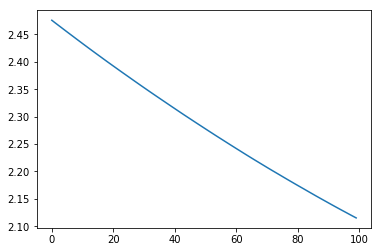

In [22]:
plt.show()

## evaluate the performance

In [23]:
import gym

In [24]:
env = gym.make('Hopper-v2')

In [25]:
s = env.reset()
s = s[None, :]

In [26]:
model.predict(s)

array([[0.2376354 , 0.15770362, 0.24333568]], dtype=float32)

In [27]:
max_steps = env.spec.timestep_limit
returns = []
for i in range(20):
    print('iter', i)
    obs = env.reset()
    done = False
    totalr = 0.
    steps = 0
    while not done:
        action = model.predict(obs[None,:])
#         observations.append(obs)
#         actions.append(action)
        obs, r, done, _ = env.step(action)
        totalr += r
        steps += 1
        if steps >= max_steps:
            break
    returns.append(totalr)

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19


In [28]:
np.mean(returns)

91.44769226378514